<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./03_PMAp_AOD_L2_load_browse.ipynb"><< 03 - PMAp - Aerosol Optical Depth - Level 2</a><span style="float:right;"><a href="./05_CAMS_European_air_quality_forecast_dust_concentration_load_browse.ipynb">05 - CAMS European air quality forecast - Dust >></a></span>

<hr>

# CAMS - Global Near-Real-Time Forecast - Dust Aerosol Optical Depth

The Copernicus Atmopshere Monitoring Service (CAMS) provides consistent and quality-controlled information related to air pollution and health and greenhouse gases. CAMS data consist of `global and regional forecasts and analyses`, `global reanalyses (EAC4)`, `fire emissions` and `greenhouse gas flux inversions`.

This notebooks provides an introduction to the CAMS global near-real-time forecast data and how the variable `Dust Aerosol Optical Depth` can be used to monitor and predict dust events.

The notebook examines the **Saharan Dust event** which occured over Europe in the second half of February 2021.

CAMS Global Near-Real-Time Forecast data are available in either `GRIB` or `netCDF` format. You can retrieve the data from the [ECMWF data archive](https://apps.ecmwf.int/datasets/data/cams-nrealtime/levtype=sfc/).

#### Module outline:
* [1 - Load and browse dust aerosol optical depth (duaod) at 550nm of the CAMS global near-real-time forecast](#load_browse)
* [2 - Retrieve the data variable dust AOD at 550nm as xarray.DataArray](#data_retrieve)
* [3 - Visualize dust AOD at 550nm](#visualize)
* [4 - Create a geographical subset for Europe](#subset)
* [5 - Animate dust AOD at 550nm changes over time](#animate)

<hr>

##### Load required libraries

In [2]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd

from IPython.display import HTML

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

##### Load helper functions

In [3]:
%run ./functions.ipynb

<hr>

### <a id='load_browse'></a>Load and browse `CAMS global near-real-time forecast` data

CAMS global near-real-time forecast data is available either in `GRIB` or `netCDF`. The data for the present example has been downloaded as `netCDF`. See an example how to download the data with the `ECMWF WebAPI` [here](./01_overview_atmospheric_composition_data_retrieve.ipynb#ecmwf_archive).

You can use xarray's function `xr.open_dataset()` to open the netCDF file as `xarray.Dataset`.

In [6]:
file = xr.open_dataset('../eodata/cams/near_real_time/2021/02/19/20210219_dustAOD.nc')
file



<xarray.Dataset>
Dimensions:    (latitude: 451, longitude: 900, time: 11)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.6 -179.2 ... 178.8 179.2 179.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * time       (time) datetime64[ns] 2021-02-19 ... 2021-02-24
Data variables:
    duaod550   (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-03-22 14:16:21 GMT by grib_to_netcdf-2.20.0: grib_to_n...

<br>

The data above has three dimensions (`latitude`, `longitude` and `time`) and one data variable:
* `duaod550`: Dust Aerosol Optical Depth at 550nm

Let us inspect the coordinates of the file more in detail.

Below, you see that the data set consists of 11 time steps, ranging from 19 February 2021 00 UTC to 24 February 2021 00 UTC in a 12-hour timestep.

In [7]:
file.time

<xarray.DataArray 'time' (time: 11)>
array(['2021-02-19T00:00:00.000000000', '2021-02-19T12:00:00.000000000',
       '2021-02-20T00:00:00.000000000', '2021-02-20T12:00:00.000000000',
       '2021-02-21T00:00:00.000000000', '2021-02-21T12:00:00.000000000',
       '2021-02-22T00:00:00.000000000', '2021-02-22T12:00:00.000000000',
       '2021-02-23T00:00:00.000000000', '2021-02-23T12:00:00.000000000',
       '2021-02-24T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-02-19 2021-02-19T12:00:00 ... 2021-02-24
Attributes:
    long_name:  time

The latitude values have a 0.4 degrees resolution and have a global N-S coverage.

In [8]:
file.latitude

<xarray.DataArray 'latitude' (latitude: 451)>
array([ 90. ,  89.6,  89.2, ..., -89.2, -89.6, -90. ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.6 89.2 88.8 ... -88.8 -89.2 -89.6 -90.0
Attributes:
    units:      degrees_north
    long_name:  latitude

The longitude values have a 0.4 degrees resolution as well, and have been reprojected to a [-180,180] grid during the data retrieval. 

In [9]:
file.longitude

<xarray.DataArray 'longitude' (longitude: 900)>
array([-180. , -179.6, -179.2, ...,  178.8,  179.2,  179.6], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.6 -179.2 ... 178.8 179.2 179.6
Attributes:
    units:      degrees_east
    long_name:  longitude

### <a id='data_retrieve'></a>Retrieve the variable `Dust Aerosol Optical Depth at 550nm` as xarray.DataArray

Let us store the data variable `Dust Aerosol Optical Depth (AOD) at 550nm` as `xarray.DataArray` with the name `du_aod`.

In [10]:
du_aod = file.duaod550
du_aod

<xarray.DataArray 'duaod550' (time: 11, latitude: 451, longitude: 900)>
[4464900 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.6 -179.2 ... 178.8 179.2 179.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * time       (time) datetime64[ns] 2021-02-19 ... 2021-02-24
Attributes:
    units:      ~
    long_name:  Dust Aerosol Optical Depth at 550nm

Above, you see that the variable `du_aod` has two attributes, `units` and `long_name`. Let us define variables for those attributes. The variables can be used for visualizing the data.

In [11]:
long_name = du_aod.long_name
units = du_aod.units

Let us do the same for the coordinates `longitude` and `latitude`.

In [12]:
latitude = du_aod.latitude
longitude = du_aod.longitude

<br>

### <a id='visualize'></a>Visualize `Dust Aerosol Optical Depth at 550nm`

The next step is to visualize the dataset. You can use the function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh), which makes use of matploblib's function `pcolormesh` and the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) library.

With `?visualize_pcolormesh` you can open the function's docstring to see what keyword arguments are needed to prepare your plot.

In [4]:
?visualize_pcolormesh

Signature:
visualize_pcolormesh(
    data_array,
    longitude,
    latitude,
    projection,
    color_scale,
    unit,
    long_name,
    vmin,
    vmax,
    set_global=True,
    lonmin=-180,
    lonmax=180,
    latmin=-90,
    latmax=90,
)
Docstring:
Visualizes a xarray.DataArray with matplotlib's pcolormesh function.

Parameters:
    data_array(xarray.DataArray): xarray.DataArray holding the data values
    longitude(xarray.DataArray): xarray.DataArray holding the longitude values
    latitude(xarray.DataArray): xarray.DataArray holding the latitude values
    projection(str): a projection provided by the cartopy library, e.g. ccrs.PlateCarree()
    color_scale(str): string taken from matplotlib's color ramp reference
    unit(str): the unit of the parameter, taken from the NetCDF file if possible
    long_name(str): long name of the parameter, taken from the NetCDF file if possible
    vmin(int): minimum number on visualisation legend
    vmax(int): maximum number on visualisation

You can make use of the variables we have defined above:
- `units`
- `long_name`
- `latitude`
- `longitude`

Additionally, you can specify the color scale and minimum and maxium data values.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Dust Aerosol Optical Depth at 550nm 2021-02-21T12:00:00.000000000'}>)

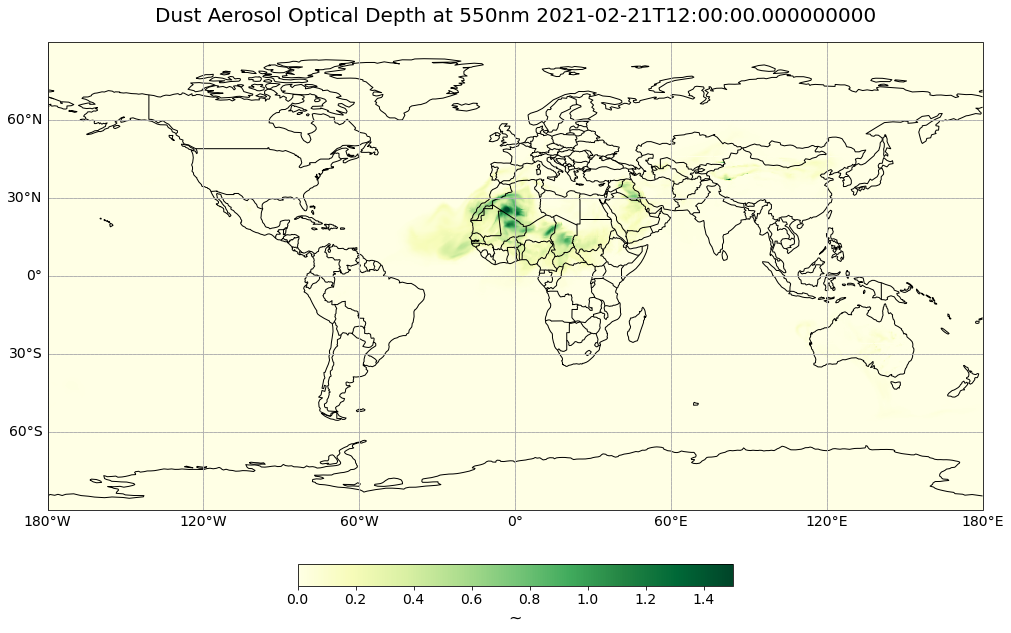

In [14]:
visualize_pcolormesh(data_array=du_aod[0,:,:],
                     longitude=longitude,
                     latitude=latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='YlGn',
                     unit=units,
                     long_name=long_name + ' ' + str(du_aod[5,:,:].time.data),
                     vmin=0, 
                     vmax=1.5,
                     lonmin=-180,
                     lonmax=180,
                     latmin=-90,
                     latmax=90,
                     set_global=True)

<br>

### <a id='subset'></a>Create a geographical subset for Europe

The map above shows organic matter of Dust Aerosol Optical Depth at 550nm globally. Let us create a geographical subset for Europe, in order to better analyse Saharan dust event which occured in February 2021 over Europe.

For geographical subsetting, you can make use of the function [generate_geographical_subset](./functions.ipynb#generate_geographical_subset). You can use `?generate_geographical_subset` to open the docstring in order to see the function's keyword arguments.

In [5]:
?generate_geographical_subset

Signature:
generate_geographical_subset(
    xarray,
    latmin,
    latmax,
    lonmin,
    lonmax,
    reassign=False,
)
Docstring:
Generates a geographical subset of a xarray.DataArray and if kwarg reassign=True, shifts the longitude grid 
from a 0-360 to a -180 to 180 deg grid.

Parameters:
    xarray(xarray.DataArray): a xarray DataArray with latitude and longitude coordinates
    latmin, latmax, lonmin, lonmax(int): lat/lon boundaries of the geographical subset
    reassign(boolean): default is False
    
Returns:
    Geographical subset of a xarray.DataArray.
File:      ~/training_course_content/01_discover_satellite_data_for_dust_monitoring/<ipython-input-3-0fa94af16892>
Type:      function


Define the bounding box information for Europe

In [15]:
latmin = 28.
latmax = 71.
lonmin = -22.
lonmax = 43

Now, let us apply the function [generate_geographical_subset](./functions.ipynb#generate_geographcial_subset) to subset the `du_aod` xarray.DataArray. Let us call the new `xarray.DataArray` `du_aod_subset`.

In [16]:
du_aod_subset = generate_geographical_subset(xarray=du_aod, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)
du_aod_subset

<xarray.DataArray 'duaod550' (time: 11, latitude: 107, longitude: 162)>
array([[[1.91569328e-04, 1.91569328e-04, 1.91569328e-04, ...,
         8.82625580e-04, 8.82625580e-04, 8.82625580e-04],
        [1.33872032e-04, 1.33872032e-04, 1.91569328e-04, ...,
         8.82625580e-04, 8.82625580e-04, 8.82625580e-04],
        [1.33872032e-04, 1.33872032e-04, 1.33872032e-04, ...,
         9.40203667e-04, 9.40203667e-04, 9.40203667e-04],
        ...,
        [2.49147415e-04, 2.49147415e-04, 2.49147415e-04, ...,
         7.41392374e-02, 8.56000185e-02, 1.15029454e-01],
        [2.49147415e-04, 2.49147415e-04, 3.64303589e-04, ...,
         4.52282429e-02, 4.94900942e-02, 6.20449781e-02],
        [2.49147415e-04, 2.49147415e-04, 4.21881676e-04, ...,
         4.04481888e-02, 4.33276892e-02, 5.27151823e-02]],

       [[1.33872032e-04, 1.33872032e-04, 1.33872032e-04, ...,
         7.67469406e-04, 7.67469406e-04, 7.67469406e-04],
        [1.33872032e-04, 1.33872032e-04, 1.33872032e-04, ...,
         7.67469406e-04, 7.67469406e-04, 7.67469406e-04],
        [1.33872032e-04, 1.33872032e-04, 1.33872032e-04, ...,
         7.67469406e-04, 7.67469406e-04, 7.67469406e-04],
...
        [1.91569328e-04, 1.91569328e-04, 1.91569328e-04, ...,
         1.86788678e-01, 1.58280849e-01, 1.38814807e-01],
        [1.91569328e-04, 1.91569328e-04, 1.91569328e-04, ...,
         2.11841106e-01, 1.73197031e-01, 1.35186553e-01],
        [1.91569328e-04, 1.91569328e-04, 1.91569328e-04, ...,
         2.51349092e-01, 2.47029662e-01, 2.23820210e-01]],

       [[1.91569328e-04, 1.91569328e-04, 1.91569328e-04, ...,
         2.09200382e-03, 1.91926956e-03, 1.74653530e-03],
        [1.91569328e-04, 1.91569328e-04, 1.91569328e-04, ...,
         2.26485729e-03, 2.03442574e-03, 1.74653530e-03],
        [1.91569328e-04, 1.91569328e-04, 1.91569328e-04, ...,
         2.49516964e-03, 2.14958191e-03, 1.80411339e-03],
        ...,
        [2.49147415e-04, 2.49147415e-04, 2.49147415e-04, ...,
         2.23417044e-01, 2.16563582e-01, 2.26123810e-01],
        [2.49147415e-04, 2.49147415e-04, 2.49147415e-04, ...,
         2.90856957e-01, 2.69432783e-01, 2.52961636e-01],
        [2.49147415e-04, 2.49147415e-04, 2.49147415e-04, ...,
         4.10820484e-01, 4.09323096e-01, 4.04024720e-01]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -21.6 -21.2 -20.8 -20.4 ... 42.0 42.4 42.8
  * latitude   (latitude) float32 70.8 70.4 70.0 69.6 ... 29.6 29.2 28.8 28.4
  * time       (time) datetime64[ns] 2021-02-19 ... 2021-02-24
Attributes:
    units:      ~
    long_name:  Dust Aerosol Optical Depth at 550nm

Let us visualize the subsetted `xarray.DataArray` again. This time, you set the `set_global` kwarg to `False` and you specify the longitude and latitude bounds specified above.

Additionally, in order to have the time information as part of the title, we add the string of the datetime information to the `long_name` variable: `long_name + ' ' + str(du_aod_subset[##,:,:].time.data)`.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Dust Aerosol Optical Depth at 550nm 2021-02-21T12:00:00.000000000'}>)

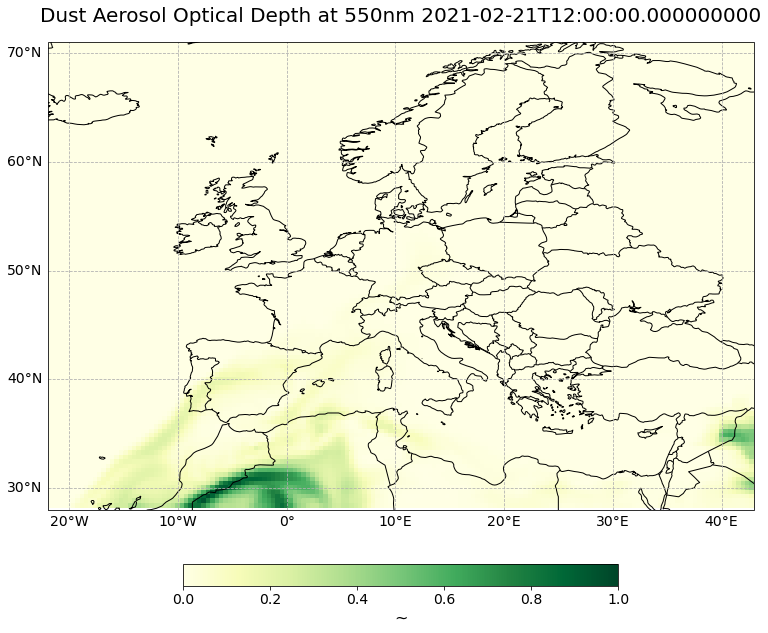

In [18]:
visualize_pcolormesh(data_array=du_aod_subset[0,:,:],
                     longitude=du_aod_subset.longitude,
                     latitude=du_aod_subset.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='YlGn',
                     unit=units,
                     long_name=long_name + ' ' + str(du_aod_subset[5,:,:].time.data),
                     vmin=0, 
                     vmax=1,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)

<br>

### <a id='animate'></a>Animate changes of `Dust Aerosol Optical Depth at 550nm` over time

In the last step, you can animate the `Dust Aerosol Optical Depth at 550nm` in order to see how the trace gas develops over a period of 4 days, from 19th to 24th February 2021.

You can do animations with matplotlib's function `animation`. Jupyter's function `HTML` can then be used to display HTML and video content.

The animation function consists of 4 parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have.
 
 
- **Functions to animate:**<br>
 An animation consists of three functions: `draw()`, `init()` and `animate()`. `draw()` is the function where individual frames are passed on and the figure is returned as image. In this example, the function redraws the plot for each time step. `init()` returns the figure you defined for the initial state. `animate()` returns the `draw()` function and animates the function over the given number of frames (time steps).
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generate animation object and convert it to a HTML5 video with the `to_html5_video` function

In [19]:
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=du_aod_subset[0,:,:],
                               longitude=du_aod_subset.longitude, 
                               latitude=du_aod_subset.latitude,
                               projection=ccrs.PlateCarree(), 
                               color_scale='YlGn', 
                               unit='-',
                               long_name=long_name + ' '+ str(du_aod_subset.time[0].data),
                               vmin=0,
                               vmax=1, 
                               lonmin=lonmin, 
                               lonmax=lonmax, 
                               latmin=latmin, 
                               latmax=latmax,
                               set_global=False)

frames = 11

def draw(i):
    img = plt.pcolormesh(du_aod_subset.longitude, 
                         du_aod_subset.latitude, 
                         du_aod_subset[i,:,:], 
                         cmap='YlGn', 
                         transform=ccrs.PlateCarree(),
                         vmin=0,
                         vmax=1,
                         shading='auto')
    
    ax.set_title(long_name + ' '+ str(du_aod_subset.time[i].data), fontsize=20, pad=20.0)
    return img


def init():
    return fig


def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)

<br>

#### Play the animation video as HTML5 video

In [20]:
HTML(ani.to_html5_video())

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./03_PMAp_AOD_L2_load_browse.ipynb"><< 03 - PMAp - Aerosol Optical Depth - Level 2</a><span style="float:right;"><a href="./05_CAMS_European_air_quality_forecast_dust_concentration_load_browse.ipynb">05 - CAMS European air quality forecast - Dust >></a></span>

<hr>

<img src='../img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br>
<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.